<h1 align="center"> Survival from Malignant Melanoma </h1>
    <h3 align="center">VIRANI PUTRI PERDANA </h3>
<h3 align="center">(09011381722138)</h3>
<h4 align="center">SISTEM KOMPUTER </h1>



Melanoma maligna adalah kanker kulit yang paling agresif dan mengancam jiwa. Ini berkembang dalam sel-sel yang memberikan warna kulit (melanosit) dan memiliki kecenderungan yang sangat tinggi untuk menyebar ke bagian lain dari tubuh. Tingkat penyembuhan sangat bergantung pada tahap melanoma pada saat deteksi. Semakin dini dideteksi, semakin baik peluang untuk sembuh. Oleh karena itu penting untuk mengetahui apa yang harus dicari dan bagaimana cara mencegahnya. 
Melanoma maligna terjadi di antara semua kelompok ras dan etnis yang dipelajari secara memadai. Frekuensi kemunculannya sangat erat kaitannya dengan warna konstitutif kulit, dan tergantung pada zona geografis. Insiden di antara kelompok etnis berkulit gelap adalah 1 per 100.000 per tahun atau kurang, tetapi di antara orang berkulit putih berkulit terang hingga 50 dan lebih tinggi di beberapa wilayah di dunia. 
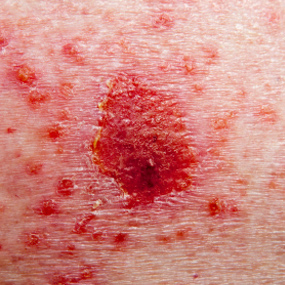

# 1. Import Library
Disini kita akan mengimport library yang akan kita gunakan 
### Library Numpy 
berfungsi untuk mengolah data dalam bentuk angka (array)
### Library Matplotlib 
berfungsi untuk membantu visualisasi dataset sehingga memudahkan untuk dipahami
### Library Sklearn 
digunakan pada tahap Preprosesing untuk mengubah data menjadi format yang lebih efektif diproses dalam jaringan saraf
### Library Pandas
Berfungsi untuk membaca file dataset dalam bentuk .CSV
### Library Seaborn
sama seperti Matplotlib,yakni berfungsi untuk membantu visualisasi dataset
### Library matplotlib.pyplot 
Digunakan Untuk Membuat Grafik Dataset Yang Telah Valid
### Library keras.optimizers 
Digunakan Untuk Mengoptimalkan Data Dengan Fungsi Adam
### Library keras.Model 
Digunakan Untuk Memasukkan Hidden Layers (Banyaknya Jalan Pada 1 Data Ke Data Yang Lain) Dengan Sequential
###  Library keras.Layers 
Digunakan Untuk Banyaknya Hidden Layers Yang Digunakan Untuk 1 Data Set (Banyaknya Cara/Jalan)
### Library keras.activations 
Digunakan Untuk Mengubah Setiap Nilai Input Negatif Menjadi 0 Pada Grafik Sesegera 
### Library seaborn
Digunakan Untuk Visualisasi Data Secara Statistik
### imblearn.over_sampling 
digunakan untuk membuat agar data yang kita miliki menjadi balance

In [1]:
import numpy as np 
import pandas as pd 
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


# 2. Dataset

### Informasi Datase

<p1>Data terdiri dari pengukuran yang dilakukan pada pasien dengan melanoma maligna. Setiap pasien mengalami pengangkatan tumor mereka dengan pembedahan di Departemen Bedah Plastik, Rumah Sakit Universitas Odense, Denmark selama periode 1962 hingga 1977. Pembedahan terdiri dari pengangkatan tumor secara menyeluruh bersama dengan sekitar 2,5 cm kulit di sekitarnya. Di antara pengukuran yang dilakukan adalah ketebalan tumor dan apakah itu ulserasi atau tidak. Ini dianggap sebagai variabel prognostik yang penting pada pasien dengan tumor tebal dan / atau ulserasi memiliki kemungkinan peningkatan kematian akibat melanoma. Pasien diikuti hingga akhir 1977. </p>

Data ini berisi kolom berikut:

- time <br>
Waktu bertahan hidup dalam beberapa hari sejak operasi, mungkin disensor.<br>

- status <br>
Status pasien pada akhir penelitian. 1 menunjukkan bahwa mereka telah meninggal akibat melanoma, 2 menunjukkan bahwa mereka masih hidup dan 3 menunjukkan bahwa mereka telah meninggal karena sebab yang tidak terkait dengan melanoma mereka.<br>

- sex <br>
Para pasien seks; 1 = laki-laki, 0 = perempuan.<br>

- age <br>
Usia dalam beberapa tahun pada saat operasi. <br>

- year <br>
Tahun beroperasi.<br>

- thickness<br>
Ketebalan tumor dalam mm. <br>

- ulcer<br>
Indikator ulserasi; 1 = sekarang, 0 = tidak ada. <br>

In [2]:
dataset=pd.read_csv("melanoma.csv", delimiter=",")
dataset.head()

,Unnamed: 0,time,status,sex,age,year,thickness,ulcer
0,1,10,3,1,76,1972,6.76,1
1,2,30,3,1,56,1968,0.65,0
2,3,35,2,1,41,1977,1.34,0
3,4,99,3,0,71,1968,2.90,0
4,5,185,1,1,52,1965,12.08,1


# 3. Mengecek apakah ada data kosong
Setelah kita menimport dataset ada baiknya kita terlebih dahulu melakukan pegecekaan terhadap dataset kita, apakah data tersebih sudah bersih atau masih ada data kosong.

In [3]:
dataset.isnull().any().sum()

0

# 4.Visualisasi Data
berfungsi mengetahui berapa banyak persebaran data terhadap nilai 0 dan 1 maka kita perlu visualisasi agar lebih muda dipahami. 

In [4]:
dataset.ulcer.value_counts()

0    115
1     90
Name: ulcer, dtype: int64

# 5.Pengecekan data
Dalam perintah ini dapat kita lihat apakah dataset kita sudah bersih atau masih ada data yang kosong. Pada dataset yang saya gunakan untuk tiap data column sudah bersih (non-null)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
Unnamed: 0    205 non-null int64
time          205 non-null int64
status        205 non-null int64
sex           205 non-null int64
age           205 non-null int64
year          205 non-null int64
thickness     205 non-null float64
ulcer         205 non-null int64
dtypes: float64(1), int64(7)
memory usage: 12.9 KB


Visualisasi Grafik Untuk O dan 1

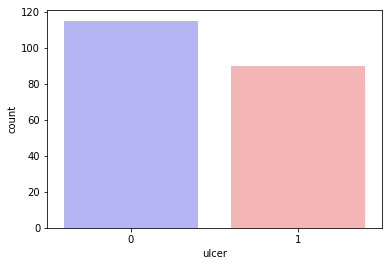

In [6]:
sns.countplot(x="ulcer", data=dataset, palette="bwr")
plt.show()

# 6.Penentuan Data
untuk menentukan data Features di mulai dari kolom 1 sampai 7 sedangkan labels hanya kolom 7

In [7]:
features = dataset.iloc[:,1:7].values
labels = dataset.iloc [:,7].values

# 7.Preprocessing
Untuk mempreprocessing dataset diatas, saya menggunakan metode MinMaxScaler dimana metode preprocessing ini mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan.  Rentang yang diberikan untuk dataset diatas adalah 0 & 1, hal ini dikarenakan mengklasifikasian dataset tersebut menggunakan binary classification.

In [8]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# 8.Penyeimbang Data
SMOTE (synthetic minority oversampling technique) adalah salah satu metode oversampling yang paling umum digunakan untuk menyelesaikan masalah ketidakseimbangan. Yang dilakukannya adalah menciptakan sampel sintetis (bukan duplikat) dari kelas minoritas. Karenanya menjadikan kelas minoritas sama dengan kelas mayoritas. SMOTE melakukan ini dengan memilih catatan yang sama dan mengubah catatan itu satu kolom pada satu waktu dengan jumlah acak dalam perbedaan dengan catatan tetangga.

In [9]:
features_smote, labels_smote = SMOTE().fit_sample(features,labels)
features = pd.DataFrame(features_smote)
labels = pd.DataFrame(labels_smote)

# 9.Splitting Data
Splitting digunakan untuk membagi data menjadi 2 bagian yaitu Training data dan Test Data

In [10]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels, test_size=0.2, shuffle=True, stratify=labels)

# 10. Mendefinisikan Model

Model yang digunakan dalam kasus ini menggunakan fungsi sequential 
setiap parameternya berisi dengan 100 hiden layer pertama, 50 hiden layer kedua, 50 hiden layer ketiga dan 25 hiden layer keempat. dan outputnya layer 1 (iya atau tidak) yang menggunakan aktivasi sigmoid di karenakan binary

In [11]:
model = Sequential()
model.add(Dense(units= 100, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 25, activation=relu))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


 # 11. Fit Model
Untuk mendapatkan hasil akurasi dan loss dari dataset, langkah selanjutnya yang harus dilakukan adalah fit model.  Dimana pada proses ini terjadi proses training dengan parameter:
1. Feature yang telah di preprocessing
2. Label  yang telah dikonversi menjadi categorical
3. Banyaknya Epochs atau proses training
4. batch_size

Disini Epochs atau training yang saya lakukan adalah sebanya 250  kali.

In [12]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=20, epochs=250)
acc_testing  = model.evaluate(testing_data, testing_label)


Train on 184 samples, validate on 46 samples
Epoch 1/250
184/184 [==============================] - 1s 3ms/step - loss: 0.6911 - accuracy: 0.5435 - val_loss: 0.6827 - val_accuracy: 0.5435
Epoch 2/250
184/184 [==============================] - 0s 190us/step - loss: 0.6830 - accuracy: 0.5652 - val_loss: 0.6732 - val_accuracy: 0.7609
Epoch 3/250
184/184 [==============================] - 0s 180us/step - loss: 0.6875 - accuracy: 0.5326 - val_loss: 0.6689 - val_accuracy: 0.7826
Epoch 4/250
184/184 [==============================] - 0s 152us/step - loss: 0.6819 - accuracy: 0.5815 - val_loss: 0.6593 - val_accuracy: 0.7174
Epoch 5/250
184/184 [==============================] - 0s 173us/step - loss: 0.6777 - accuracy: 0.5978 - val_loss: 0.6500 - val_accuracy: 0.8043
Epoch 6/250
184/184 [==============================] - 0s 249us/step - loss: 0.6693 - accuracy: 0.6087 - val_loss: 0.6387 - val_accuracy: 0.7826
Epoch 7/250
184/184 [==============================] - 0s 168us/step - loss: 0.6613 - 

184/184 [==============================] - 0s 108us/step - loss: 0.3248 - accuracy: 0.8804 - val_loss: 0.4471 - val_accuracy: 0.8261
Epoch 112/250
184/184 [==============================] - 0s 160us/step - loss: 0.2892 - accuracy: 0.8696 - val_loss: 0.4085 - val_accuracy: 0.8913
Epoch 113/250
184/184 [==============================] - 0s 126us/step - loss: 0.2943 - accuracy: 0.8587 - val_loss: 0.4352 - val_accuracy: 0.8478
Epoch 114/250
184/184 [==============================] - 0s 119us/step - loss: 0.2946 - accuracy: 0.8913 - val_loss: 0.4381 - val_accuracy: 0.8478
Epoch 115/250
184/184 [==============================] - 0s 119us/step - loss: 0.2757 - accuracy: 0.8859 - val_loss: 0.4289 - val_accuracy: 0.8478
Epoch 116/250
184/184 [==============================] - 0s 152us/step - loss: 0.3034 - accuracy: 0.8859 - val_loss: 0.4511 - val_accuracy: 0.8261
Epoch 117/250
184/184 [==============================] - 0s 130us/step - loss: 0.2851 - accuracy: 0.8967 - val_loss: 0.4570 - val_ac

Epoch 167/250
184/184 [==============================] - 0s 190us/step - loss: 0.1955 - accuracy: 0.9130 - val_loss: 0.6435 - val_accuracy: 0.8696
Epoch 168/250
184/184 [==============================] - 0s 136us/step - loss: 0.1919 - accuracy: 0.9348 - val_loss: 0.6681 - val_accuracy: 0.8261
Epoch 169/250
184/184 [==============================] - 0s 114us/step - loss: 0.1846 - accuracy: 0.9185 - val_loss: 0.6480 - val_accuracy: 0.8478
Epoch 170/250
184/184 [==============================] - 0s 125us/step - loss: 0.1721 - accuracy: 0.9348 - val_loss: 0.6580 - val_accuracy: 0.8043
Epoch 171/250
184/184 [==============================] - 0s 114us/step - loss: 0.1744 - accuracy: 0.9402 - val_loss: 0.6865 - val_accuracy: 0.8261
Epoch 172/250
184/184 [==============================] - 0s 124us/step - loss: 0.1845 - accuracy: 0.9293 - val_loss: 0.6631 - val_accuracy: 0.8913
Epoch 173/250
184/184 [==============================] - 0s 168us/step - loss: 0.1952 - accuracy: 0.9130 - val_loss: 0

Epoch 223/250
184/184 [==============================] - 0s 179us/step - loss: 0.1628 - accuracy: 0.9348 - val_loss: 0.8988 - val_accuracy: 0.8696
Epoch 224/250
184/184 [==============================] - 0s 325us/step - loss: 0.1756 - accuracy: 0.9076 - val_loss: 0.8855 - val_accuracy: 0.8696
Epoch 225/250
184/184 [==============================] - 0s 206us/step - loss: 0.2097 - accuracy: 0.9022 - val_loss: 0.8869 - val_accuracy: 0.8043
Epoch 226/250
184/184 [==============================] - 0s 157us/step - loss: 0.2182 - accuracy: 0.9076 - val_loss: 0.8248 - val_accuracy: 0.8696
Epoch 227/250
184/184 [==============================] - 0s 363us/step - loss: 0.1840 - accuracy: 0.9022 - val_loss: 0.8575 - val_accuracy: 0.8478
Epoch 228/250
184/184 [==============================] - 0s 179us/step - loss: 0.1634 - accuracy: 0.9402 - val_loss: 0.8467 - val_accuracy: 0.8478
Epoch 229/250
184/184 [==============================] - 0s 255us/step - loss: 0.1908 - accuracy: 0.9293 - val_loss: 0

# 12. Akurasi
 di sini kita menghitung akurasi . dan akurasi yang di dapat yaitu : 0.8695651888847351

In [13]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.8695651888847351


In [14]:
acc_training.history

{'val_loss': [0.6826835507931917,
  0.673193967860678,
  0.66889103340066,
  0.6592920966770338,
  0.6500494091407113,
  0.6386886964673582,
  0.6263039371241694,
  0.5990745839865311,
  0.5711789908616439,
  0.551198845324309,
  0.5479194055432859,
  0.508833224358766,
  0.4924048185348511,
  0.4933537270711816,
  0.5205069961755172,
  0.5320509490759476,
  0.511657512706259,
  0.47136933907218603,
  0.4908945586370385,
  0.46485102954118146,
  0.4908848715865094,
  0.46341843190400495,
  0.4576210846071658,
  0.46256465238073596,
  0.4702342178510583,
  0.47844667538352637,
  0.46321738154991815,
  0.4644078262474226,
  0.4499672327352607,
  0.44443571049234143,
  0.45363998801811883,
  0.43723522968914197,
  0.4662293843601061,
  0.4604039075581924,
  0.4924555861431619,
  0.49136151049448096,
  0.4535693137542061,
  0.42882345422454504,
  0.4547034696392391,
  0.4662590584029322,
  0.4557874967222628,
  0.4323510592398436,
  0.4328626433144445,
  0.4284724385842033,
  0.45363697927

# 13. Plotting Model Akurasi dan Loss Akurasi

Grafik pertama menampilkan hasil Plot dari akurasi sedangkan grafik kedua menampilkan hasil plot dari loss

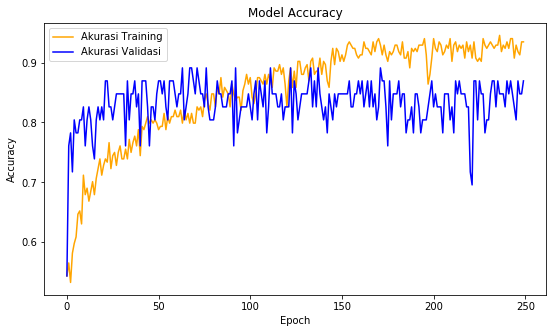

In [15]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(9,5))
ax0.plot(acc_training.history['accuracy'],'orange', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

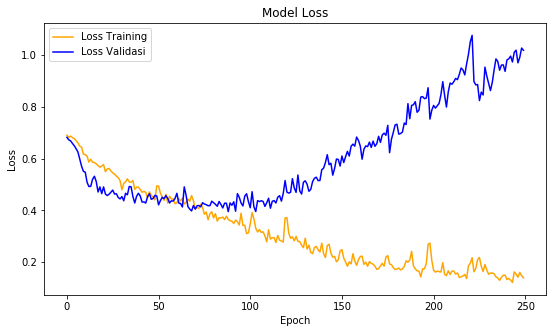

In [16]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(9,5))
ax1.plot(acc_training.history['loss'],'orange', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

# 14. Confusion Matrix
CONFUSION MATRIK adalah tabel yang sering digunakan untuk menggambarkan kinerja model klasifikasi (atau "classifier") pada set data uji yang nilai sebenarnya diketahui.


Pengukuran terhadap kinerja suatu sistem klasifikasi merupakan hal yang penting. Kinerja sistem klasifikasi menggambarkan seberapa baik sistem dalam mengklasifikasikan data. Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya .
Confusion Matriks memiliki 4 instilah yaitu

    -True Positif
    -False Positif
    -False Negative
    -True Negativ
    
    
1. True Positives (TP): True positif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi juga 1 (Benar)

2. Negatif Benar (TN): True Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan prediksi juga 0 (Salah

3. Salah Positif (FP): False positif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan yang diprediksi adalah 1 (Benar).

4. Negatif Palsu (FN): False Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi adalah 0 (Salah).

Untuk dapat menghitung Confusion Matrix pada dataset yang telah diolah, kita dapat deklarasikan model predict dari data training dan data testing

In [17]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [18]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())

In [19]:
training_cm

array([[87,  5],
       [ 4, 88]], dtype=int64)

dibawah ini merupakan hasil perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada data training

In [20]:
#training
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.9510869565217391
Specificity training 0.9565217391304348
Sensitivity training 0.9456521739130435
Precision training 0.9560439560439561
F1 Score training 0.9508196721311475


In [21]:
print(testing_cm)

[[21  2]
 [ 4 19]]


dibawah ini merupakan hasil perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada data testing

In [22]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.8695652173913043
Specificity testing 0.8260869565217391
Sensitivity testing 0.9130434782608695
Precision testing 0.84
F1 Score testing 0.8749999999999999


# 15.Referensi
1. Paper : Probabilistic Artificial Neural Networks for Malignant Melanoma Prognosis

   Link : https://link.springer.com/chapter/10.1007/3-211-27389-1_102
   
   
2. Dataset: https://vincentarelbundock.github.io/Rdatasets/datasets.html
